In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, parser='auto')
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

Dataset shape: (506, 13)
Target shape: (506,)

Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [ ]:
missing_values = X.isnull().sum()
print(f"Missing values per feature:\n{missing_values}")
print(f"Total missing values: {missing_values.sum()}")

Missing values per feature:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
Total missing values: 0


In [ ]:
#EDA
print("\nDataset Statistics:")
print(X.describe())
print(f"\nTarget Variable Statistics:")
print(y.describe())


Dataset Statistics:
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT  
count  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063  
std      2.105710  168.537116    2.164946   9

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Features normalized (mean=0, std=1)")
print(f"\nSample of normalized features:")
print(X_train_scaled.head())


Features normalized (mean=0, std=1)

Sample of normalized features:
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.287702 -0.500320  1.033237 -0.278089  0.489252 -1.428069  1.028015   
1 -0.336384 -0.500320 -0.413160 -0.278089 -0.157233 -0.680087 -0.431199   
2 -0.403253  1.013271 -0.715218 -0.278089 -1.008723 -0.402063 -1.618599   
3  0.388230 -0.500320  1.033237 -0.278089  0.489252 -0.300450  0.591681   
4 -0.325282 -0.500320 -0.413160 -0.278089 -0.157233 -0.831094  0.033747   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.802173  1.706891  1.578434  0.845343 -0.074337  1.753505  
1  0.324349 -0.624360 -0.584648  1.204741  0.430184 -0.561474  
2  1.330697 -0.974048 -0.602724 -0.637176  0.065297 -0.651595  
3 -0.839240  1.706891  1.578434  0.845343 -3.868193  1.525387  
4 -0.005494 -0.624360 -0.584648  1.204741  0.379119 -0.165787  


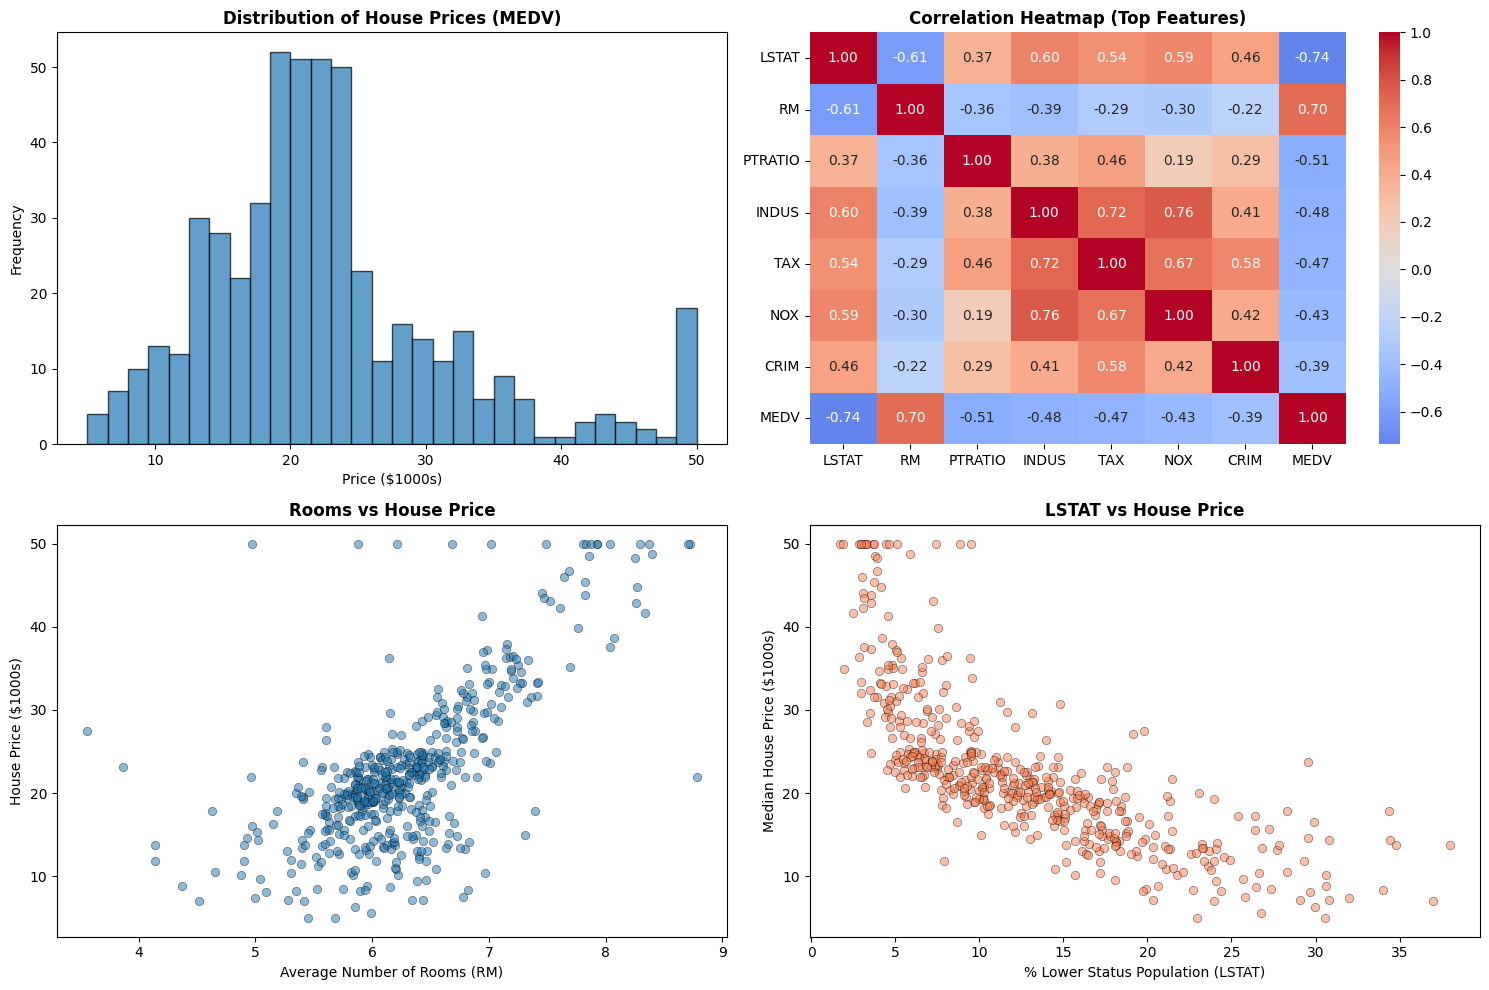


Feature Correlations with House Price:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of target variable
axes[0, 0].hist(y, bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of House Prices (MEDV)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Price ($1000s)')
axes[0, 0].set_ylabel('Frequency')

# Correlation heatmap (top features)
correlation_matrix = pd.concat([X, y], axis=1).corr()
top_features = correlation_matrix['MEDV'].abs().sort_values(ascending=False)[1:8].index
sns.heatmap(pd.concat([X[top_features], y], axis=1).corr(), annot=True, cmap='coolwarm',
            center=0, ax=axes[0, 1], fmt='.2f')
axes[0, 1].set_title('Correlation Heatmap (Top Features)', fontsize=12, fontweight='bold')

# Scatter plot: RM vs MEDV
axes[1, 0].scatter(X['RM'], y, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[1, 0].set_title('Rooms vs House Price', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Average Number of Rooms (RM)')
axes[1, 0].set_ylabel('House Price ($1000s)')

# Scatter plot: LSTAT vs MEDV
axes[1, 1].scatter(X['LSTAT'], y, alpha=0.5, edgecolors='k', linewidth=0.5, color='coral')
axes[1, 1].set_title('LSTAT vs House Price', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('% Lower Status Population (LSTAT)')
axes[1, 1].set_ylabel('Median House Price ($1000s)')

plt.tight_layout()
plt.show()

# 4.3 Feature Correlations with Target
print("\nFeature Correlations with House Price:")
correlations = pd.concat([X, y], axis=1).corr()['MEDV'].sort_values(ascending=False)
print(correlations)

In [ ]:
#Train/test split
print("\nSplitting data into train/test sets (80/20)")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Train/Test ratio: {X_train.shape[0]/X_test.shape[0]:.1f}:1")


Splitting data into train/test sets (80/20)
Training set size: 404 samples
Test set size: 102 samples
Train/Test ratio: 4.0:1
